## **Problem Statement**
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.  


Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


#### **Dataset Details**
**Attributes**  

**People**     

●	**ID**: Customer's unique identifier    
●	**Year_Birth**: Customer's birth year   
●	**Education**: Customer's education level   
●	**Marital_Status**: Customer's marital status   
●	**Income**: Customer's yearly household income    
●	**Kidhome**: Number of children in customer's household  
●	**Teenhome**: Number of teenagers in customer's household   
●	**Dt_Customer**: Date of customer's enrollment with the company  
●	**Recency**: Number of days since customer's last purchase   
●	**Complain**: 1 if the customer complained in the last 2 years, 0 otherwise   


**Products**   

●	**MntWines**: Amount spent on wine in last 2 years   
●	**MntFruits**: Amount spent on fruits in last 2 years    
●	**MntMeatProducts**: Amount spent on meat in last 2 years    
●	**MntFishProducts**: Amount spent on fish in last 2 years    
●	**MntSweetProducts**: Amount spent on sweets in last 2 years     
●	**MntGoldProds**: Amount spent on gold in last 2 years    


**Promotion**   

●	**NumDealsPurchases**: Number of purchases made with a discount  
●	**AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise   
●	**AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise    
●	**AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise    
●	**AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise    
●	**AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise    
●	**Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise   


**Place**

●	**NumWebPurchases**: Number of purchases made through the company’s website        
●	**NumCatalogPurchases**: Number of purchases made using a catalogue     
●	**NumStorePurchases**: Number of purchases made directly in stores     
●	**NumWebVisitsMonth**: Number of visits to company’s website in the last month     

## **Target** ##

Need to perform clustering to summarize customer segments.




### **Importing Dependencies**

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#### **Importing Dataset**

In [131]:
df=pd.read_excel("marketing_campaign.xlsx")
#Seeing entire columns
pd.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


###### **No of Rows and Columns**

In [132]:
df.shape

(2240, 29)

We can see that the dataset contains 29 columns and 2240 Rows

#### **Total information of a Dataset**

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

we can see here the dataset contains no null values except income feature. But let check once again by individual col

In [134]:
print(df.isnull().any())

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool


Here by seeing this., Income feature may has some null values.., lets see in detail...

In [135]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


##### **Replacing Null Values with median Value**

In [136]:
df['Income'].fillna(df['Income'].median(), inplace=True)

lets cross check..,

In [137]:
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


Now we have replaced null values with median value

In [138]:
#Finding Duplicates for Customer ID column if any
df['ID'].duplicated().sum()

0

In [139]:
df.drop('ID', axis=1, inplace=True)

#### **Finding unique values of each column**

In [140]:
df.nunique()

Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

## **Univariate Analysis**

In [141]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52237.975446,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,11.984069,25037.955891,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


###### **Exploring Year_of_Birth**

In [142]:
Year_of_Birth=df['Year_Birth'].value_counts()
Year_of_Birth

Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64

In [143]:
#converting date of year to age

df['Age'] = 2023 - df['Year_Birth']
print(df['Age'])

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2240, dtype: int64


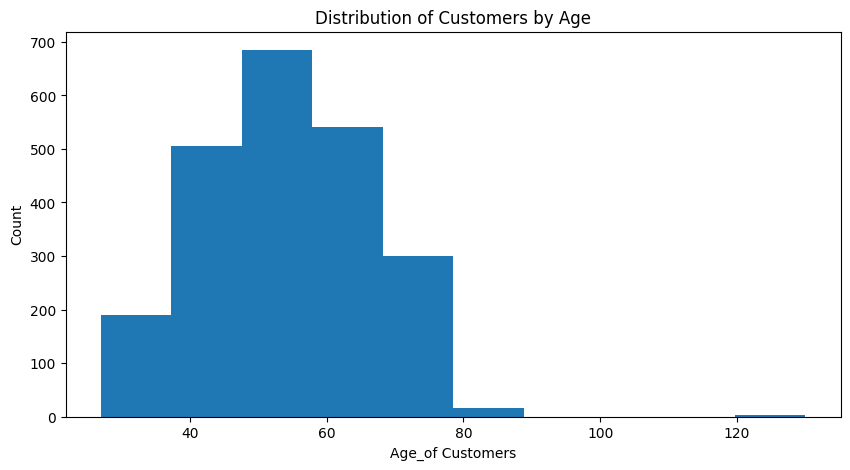

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(df['Age'].values, bins=10)
plt.xlabel('Age_of Customers')
plt.ylabel('Count')
plt.title('Distribution of Customers by Age')
plt.show()

-----> By seeing the above graph we can conclude that most of the customers are age of **20 and 78**

In [145]:
# Graphicla representation of Customers birth ---> Bar Plot

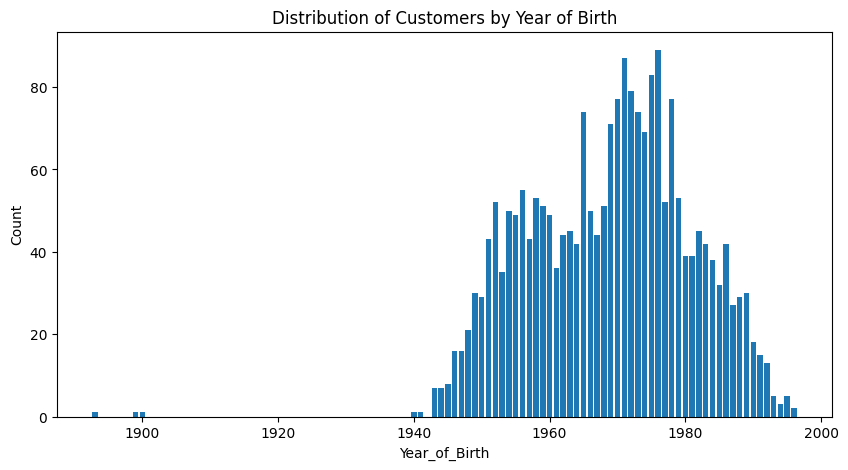

In [146]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(Year_of_Birth.index,Year_of_Birth.values)
plt.xlabel('Year_of_Birth')
plt.ylabel('Count')
plt.title('Distribution of Customers by Year of Birth')
plt.show()

----> Here we can conclude that by seeing this graph most of the people born between **1950** and **1990**

In [147]:
#Box plot Representation

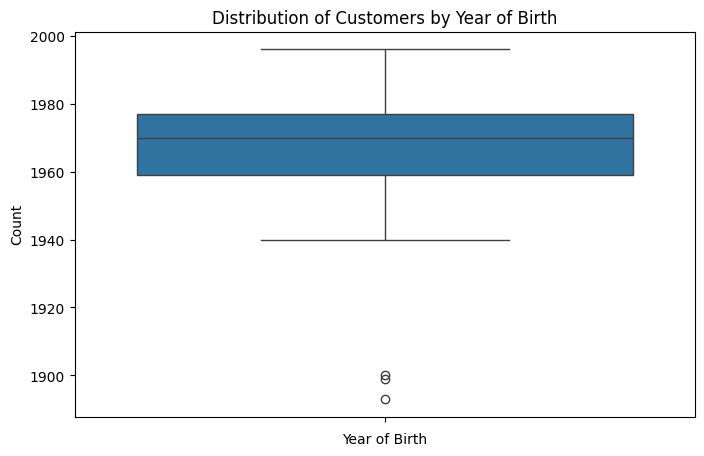

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(df['Year_Birth'])
plt.xlabel('Year of Birth')
plt.ylabel('Count')
plt.title('Distribution of Customers by Year of Birth')
plt.show()

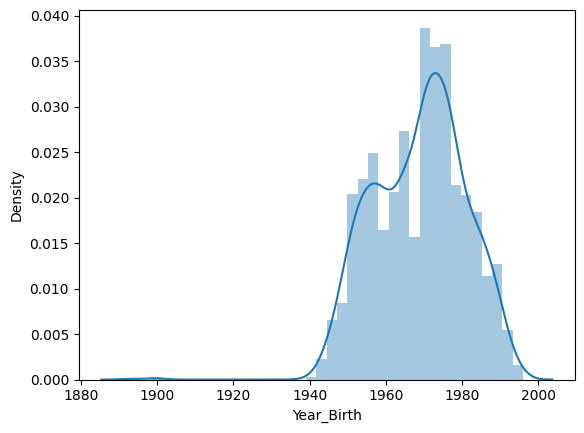

In [149]:
# Distribution Plot
sns.distplot(df['Year_Birth']);

In [150]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42


##### **Exploring Education**

In [151]:
Qualification=df['Education'].value_counts()
Qualification

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

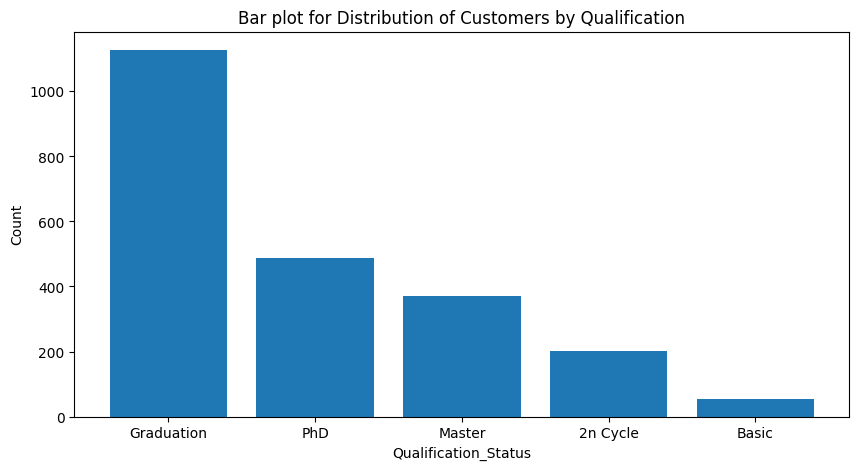

In [152]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(Qualification.index,Qualification.values)
plt.xlabel('Qualification_Status')
plt.ylabel('Count')
plt.title('Bar plot for Distribution of Customers by Qualification')
plt.show()

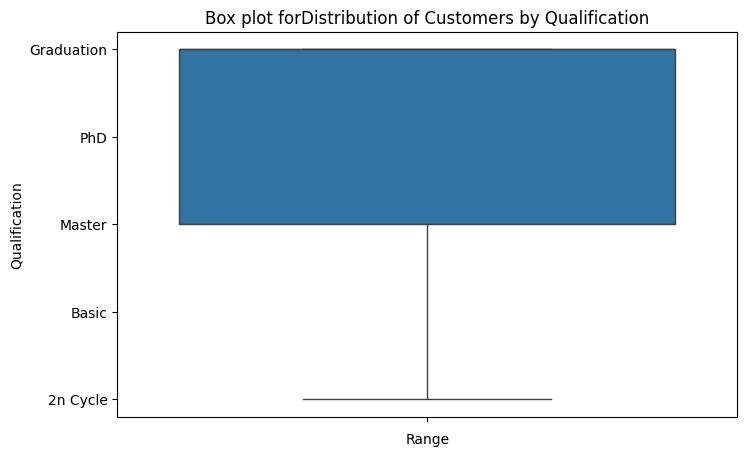

In [153]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(df['Education'])
plt.xlabel('Range')
plt.ylabel('Qualification')
plt.title('Box plot forDistribution of Customers by Qualification')
plt.show()

By seeing the Plots we can conclude that most of the customers are from **Graduation,phd and Masters** background

##### **Exploring Martial Status**

In [154]:
Living=df['Marital_Status'].value_counts()
Living

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

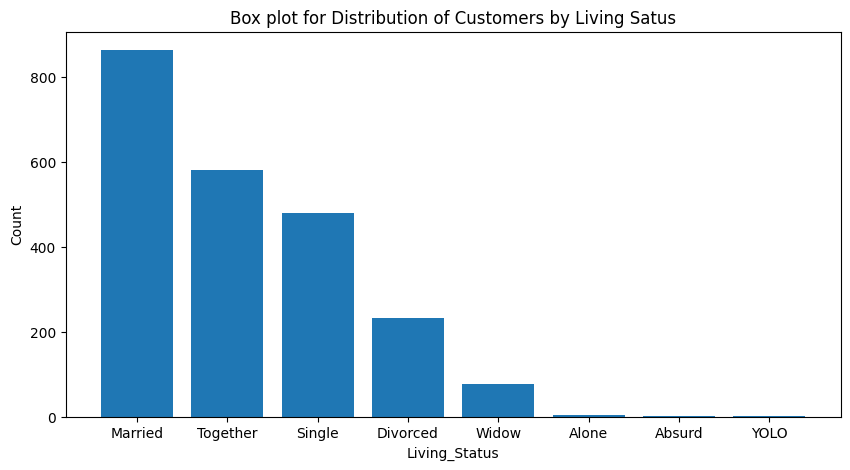

In [155]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(Living.index,Living.values)
plt.xlabel('Living_Status')
plt.ylabel('Count')
plt.title('Box plot for Distribution of Customers by Living Satus')
plt.show()

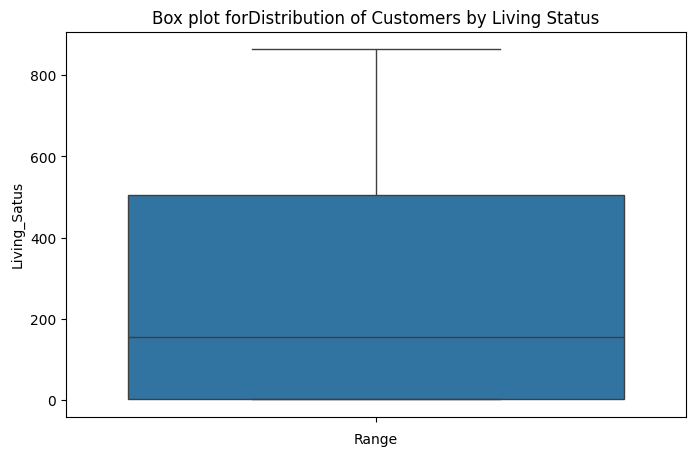

In [156]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(Living)
plt.xlabel('Range')
plt.ylabel('Living_Satus')
plt.title('Box plot forDistribution of Customers by Living Status')
plt.show()

We can conclude that most of the Customers are **Single , Together and Married**     
Most Data lies Between **50 to 500**

#### **Exploring Income**

In [157]:
Earning=df['Income'].value_counts()
Earning

Income
51381.5    24
7500.0     12
35860.0     4
37760.0     3
83844.0     3
           ..
40760.0     1
41452.0     1
6835.0      1
33622.0     1
52869.0     1
Name: count, Length: 1975, dtype: int64

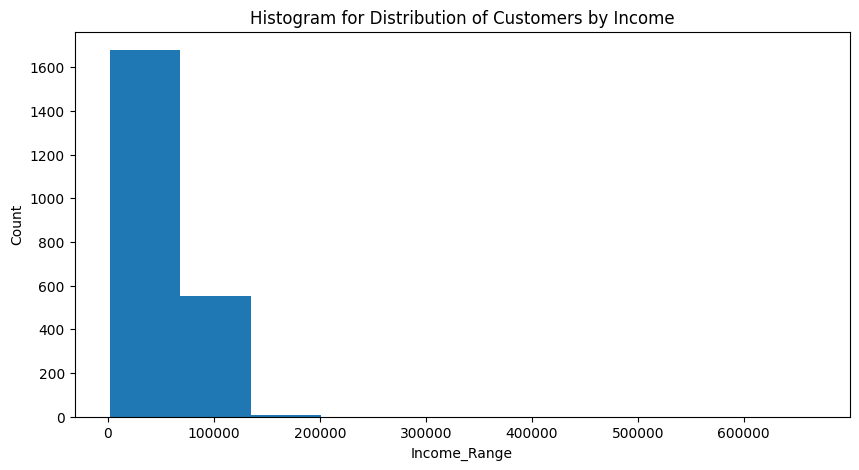

In [158]:
#Histogram for Income

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(df['Income'], bins=10)
plt.xlabel('Income_Range')
plt.ylabel('Count')
plt.title('Histogram for Distribution of Customers by Income')
plt.show()


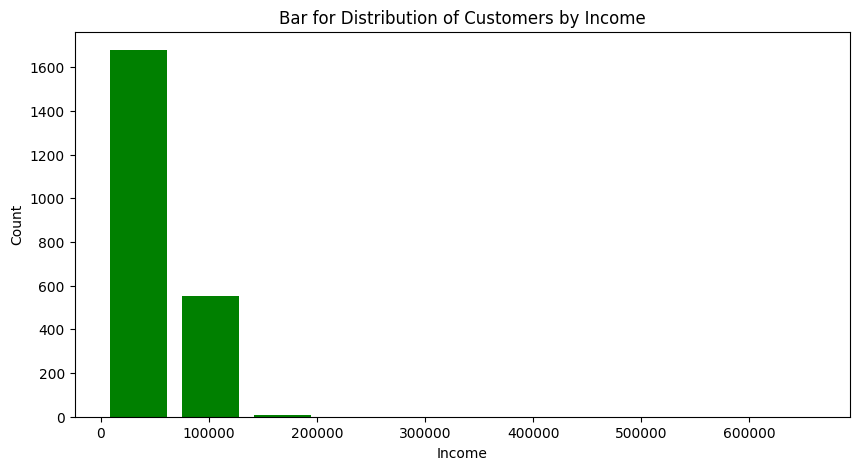

In [159]:
#Bar for Income in range

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(df['Income'], bins=10, color='green', rwidth=0.8)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Bar for Distribution of Customers by Income')
plt.show()


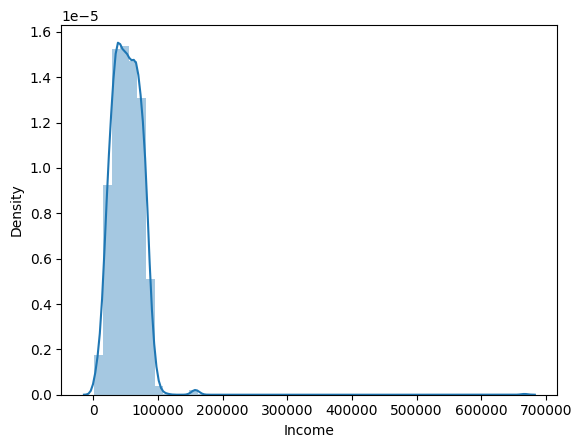

In [160]:
#Distribution Plot
sns.distplot(df['Income']);


We can conclude that most of the people are **earning Below 1Lakh**

In [161]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42


## **Multivariate Analysis**

#### **Bar Plot for Amount Spending On Items**

In [162]:
Amount_Spend = df[['MntWines','MntMeatProducts','MntFruits','MntFishProducts','MntSweetProducts','MntGoldProds']]

<Axes: >

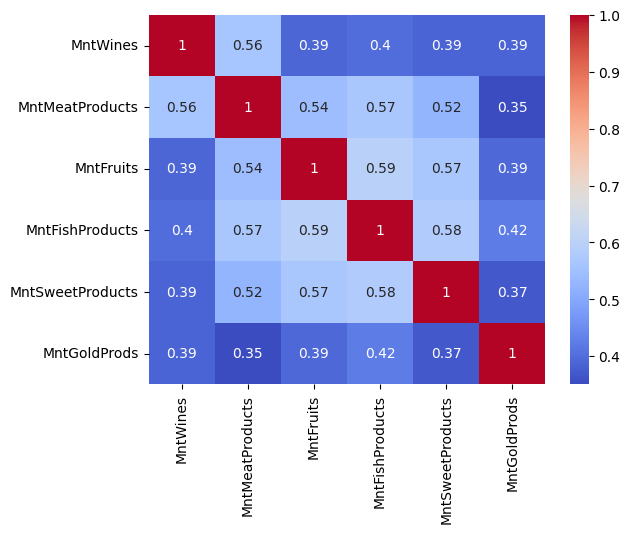

In [163]:
# Correlaion amoung Amount_Spend Items

sns.heatmap(Amount_Spend.corr(),annot=True,cmap='coolwarm')

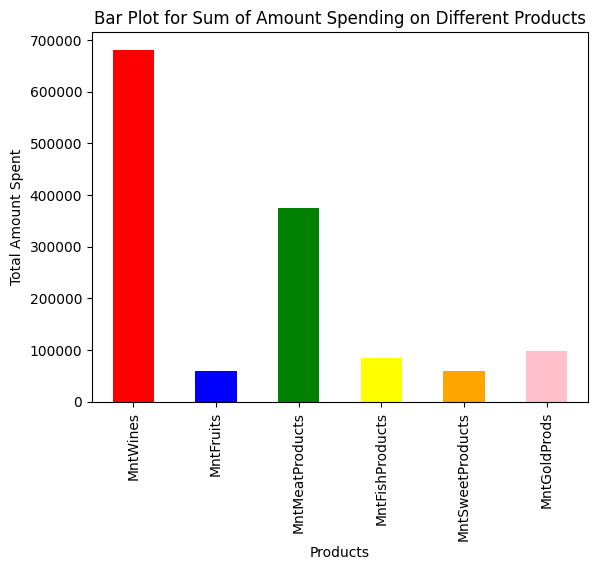

In [164]:
# Bar plot for sum of amount_spending on diff products with diff colors

import matplotlib.pyplot as plt
Amount_Spend = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
Amount_Spend.sum().plot(kind='bar', color=['red','blue','green','yellow','orange','pink'])
plt.xlabel('Products')
plt.ylabel('Total Amount Spent')
plt.title('Bar Plot for Sum of Amount Spending on Different Products')
plt.show()


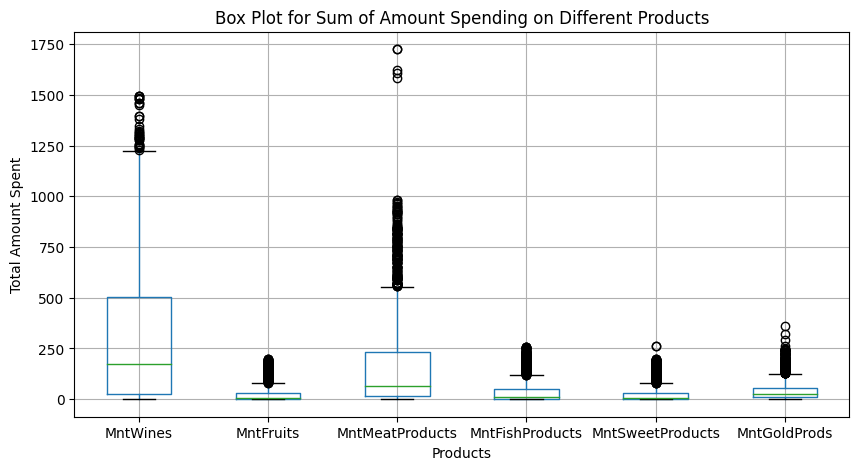

In [165]:
#box plot that total amount spend according to each product

import matplotlib.pyplot as plt
Amount_Spend = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
Amount_Spend.boxplot(figsize=(10,5))
plt.xlabel('Products')
plt.ylabel('Total Amount Spent')
plt.title('Box Plot for Sum of Amount Spending on Different Products')
plt.show()


Here we can conclude that Most of the Customers spend their amount for **Wines Purchase**

#### **Grouping and aggregations**

##### **Single grouping multi Agrregation**

In [166]:
# As we have proof that Customers mostly Purchasing wines
# Analysing Wines purchases

wines_living_stat = df.groupby('Marital_Status').agg({'MntWines':['sum','mean','max']})
print(wines_living_stat)
print('/n')
wines_purchase = df.groupby('Marital_Status').agg({'MntWines':['sum']})
wines_purchase

               MntWines                  
                    sum        mean   max
Marital_Status                           
Absurd              711  355.500000   471
Alone               554  184.666667   534
Divorced          75364  324.844828  1459
Married          258751  299.480324  1493
Single           138399  288.331250  1332
Together         177959  306.825862  1492
Widow             28434  369.272727  1462
YOLO                644  322.000000   322
/n


,MntWines
,sum
Marital_Status,
Absurd,711
Alone,554
Divorced,75364
Married,258751
Single,138399
Together,177959
Widow,28434
YOLO,644


##### **Single grouping and single aggregation on multiple columns**

In [167]:
#Grouping by martial Status with purchasing on differnet productis

df.groupby(['Marital_Status'])[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Marital_Status,,,,,,
Absurd,711,169,625,411,61,408
Alone,554,12,79,23,21,81
Divorced,75364,6363,34848,8130,6222,10739
Married,258751,22235,138829,30569,23070,36999
Single,138399,12881,87412,18344,13086,20990
Together,177959,14703,97500,22615,15151,24937
Widow,28434,2548,14575,3957,3004,4371
YOLO,644,6,100,8,6,84


-----> By observing the above table.., **married** people are intrested in **purchasing all products** then after that Co-living people

In [168]:
#Grouping by Education Status with purchasing on differnet products

df.groupby(['Education'])[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
2n Cycle,40231,5878,28675,9639,6953,9419
Basic,391,600,618,921,654,1233
Graduation,320371,34683,202284,48630,35351,57307
Master,123238,8012,60450,11877,7835,14947
PhD,196585,9744,81941,12990,9828,15703



By observing the above table.., **Graduates** people are intrested in **purchasing all products** then after that Master's people

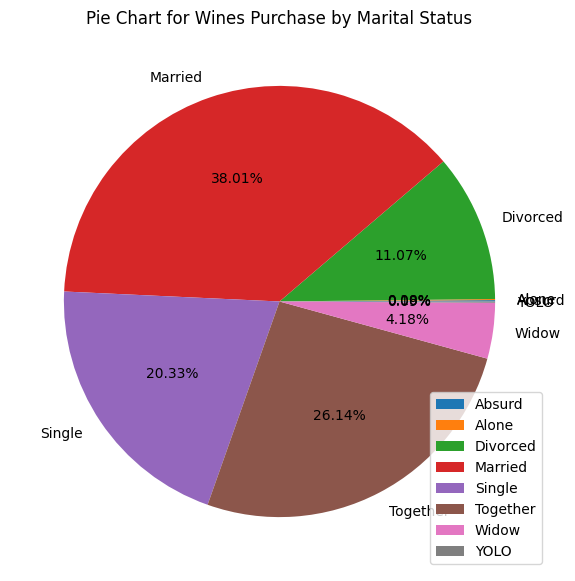

In [169]:
# piechart  for   winespurchase  with martial status in detail with legend

import matplotlib.pyplot as plt
marital_status = wines_purchase.index.to_list()
wines_sum = wines_purchase['MntWines']['sum'].to_list()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(wines_sum, labels=marital_status, autopct="%.2f%%")
plt.title("Pie Chart for Wines Purchase by Marital Status")
plt.legend(loc="lower right")
plt.show()


##### We can clearly see that **married people** are spending more amount to **wines purchase**

In [170]:
#Analysing Meat Purchases
meat_purchase = df.groupby('Marital_Status').agg({'MntMeatProducts':['sum']})
meat_purchase

,MntMeatProducts
,sum
Marital_Status,
Absurd,625
Alone,79
Divorced,34848
Married,138829
Single,87412
Together,97500
Widow,14575
YOLO,100


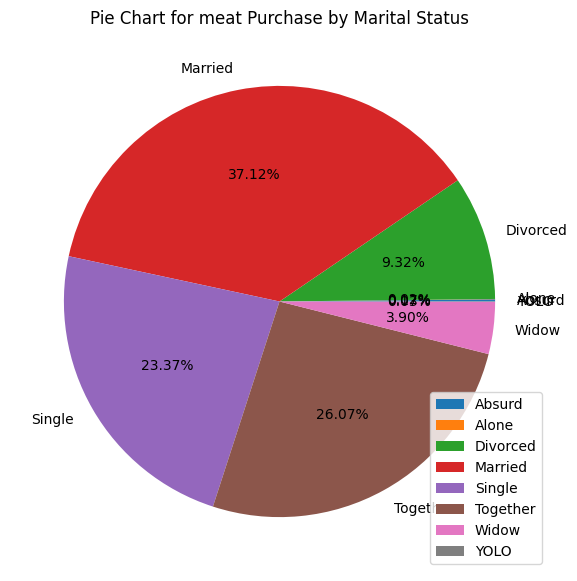

In [171]:
# piechart  for   winespurchase  with martial status in detail with legend

import matplotlib.pyplot as plt
marital_status_meat = meat_purchase.index.to_list()
meat_purchase_sum = meat_purchase['MntMeatProducts']['sum'].to_list()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(meat_purchase_sum, labels=marital_status_meat, autopct="%.2f%%")
plt.title("Pie Chart for meat Purchase by Marital Status")
plt.legend(loc="lower right")
plt.show()

----> Here also **married** people are purchasing mostly **meat products**

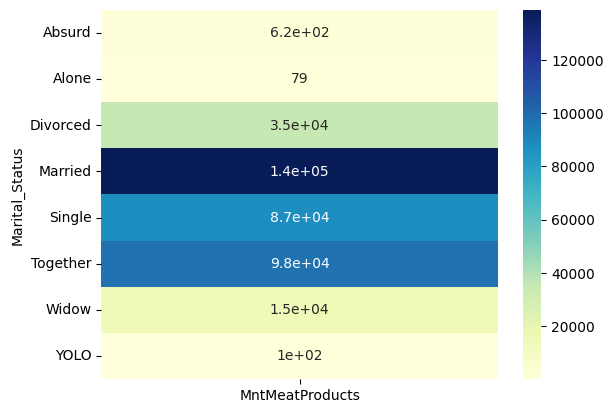

In [172]:
# Create a heatmap for meat purchase according to marital status
meat_purchase_heatmap = df.pivot_table(values='MntMeatProducts', index='Marital_Status', aggfunc='sum')
sns.heatmap(meat_purchase_heatmap, annot=True, cmap="YlGnBu")
plt.show()


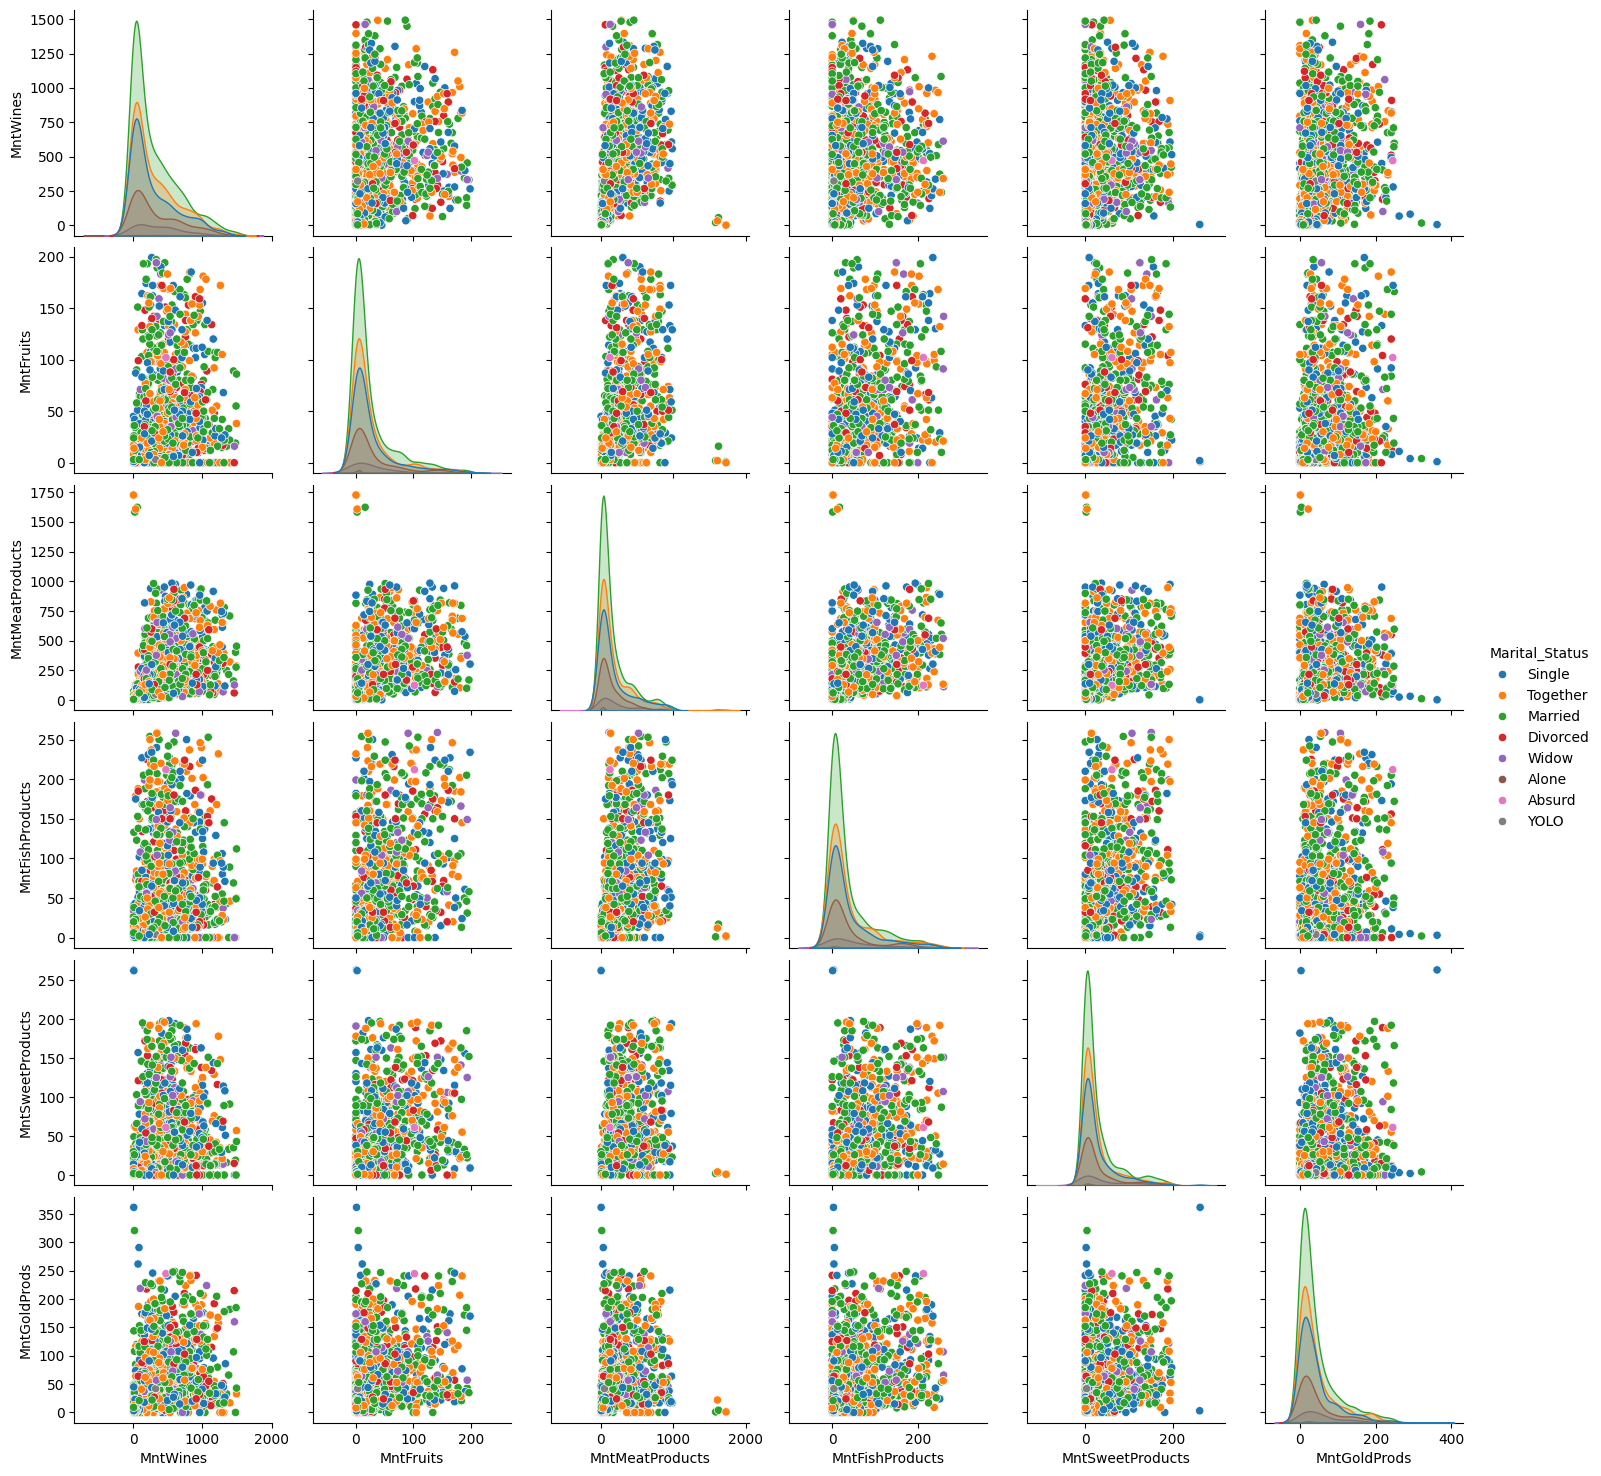

In [173]:
Amount_Spend_by_livingstat = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Marital_Status']]
sns.pairplot(Amount_Spend_by_livingstat, hue='Marital_Status')

### **Analysing Platform where people are purchased prouduct**

In [174]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42


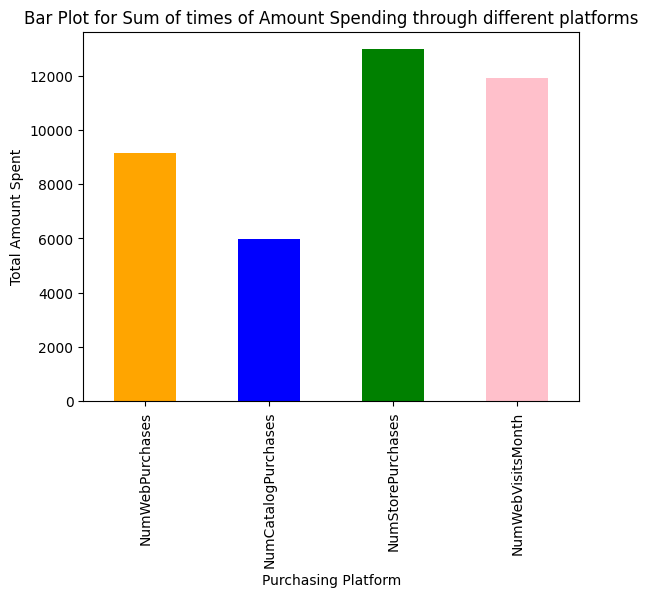

In [175]:
# Bar plot for sum of Purchasing_platform  with diff colors

import matplotlib.pyplot as plt
Amount_Spend_platform = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]
Amount_Spend_platform.sum().plot(kind='bar', color=['orange','blue','green','pink'])
plt.xlabel('Purchasing Platform')
plt.ylabel('Total Amount Spent')
plt.title('Bar Plot for Sum of times of Amount Spending through different platforms')
plt.show()


---> So by seeing this bar plot., we can conclude that most of the **customers are intrested in Purchasing items through Store only**., then after **Online**

<Axes: >

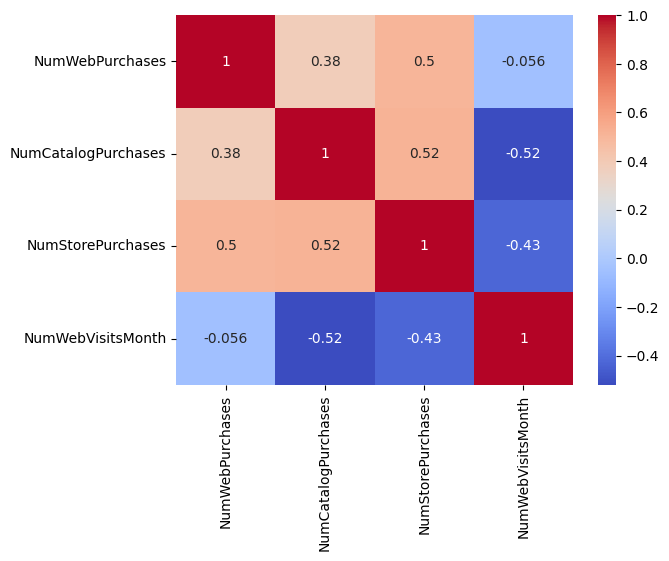

In [176]:
# Correlaion amoung Amount_Spend_platform Items

sns.heatmap(Amount_Spend_platform.corr(),annot=True,cmap='coolwarm')

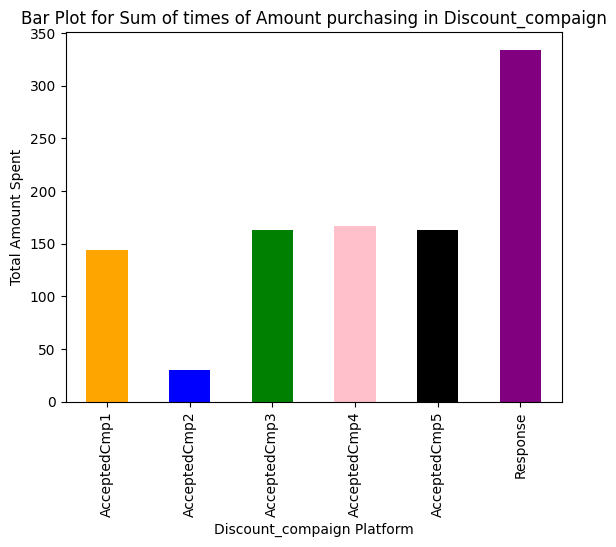

In [177]:
# Bar plot for sum of purchasing in Discount_compaign  with diff colors

import matplotlib.pyplot as plt
Discount_compaign = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']]
Discount_compaign.sum().plot(kind='bar', color=['orange','blue','green','pink','black','purple'])
plt.xlabel('Discount_compaign Platform')
plt.ylabel('Total Amount Spent')
plt.title('Bar Plot for Sum of times of Amount purchasing in Discount_compaign')
plt.show()

---> Here we can conclude that most of the customers **accepeted discount** in **Last compaign (Response)**

<Axes: >

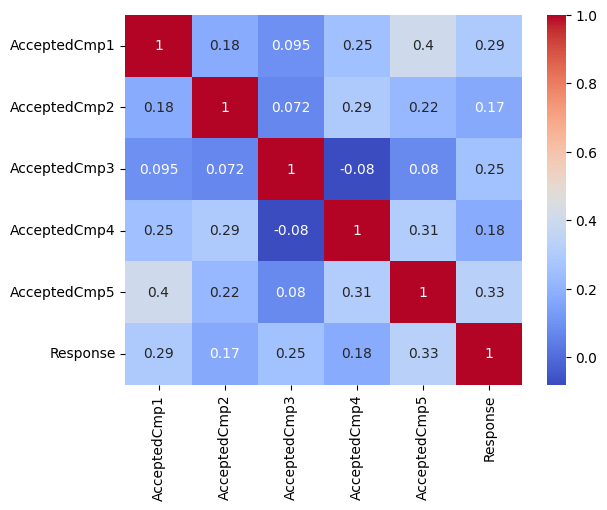

In [178]:
# Correlaion amoung Discount_compaign Items

sns.heatmap(Discount_compaign.corr(),annot=True,cmap='coolwarm')

## **Feature Engineering**

In [179]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42


-->  Identifying best feature by doing **Principle component analysis** on dataset

In [180]:
# dropping few cols column from dataset

df.drop(['Age','Dt_Customer','Z_CostContact','Z_Revenue'], axis=1, inplace=True)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [181]:
df.shape

(2240, 25)

##### we can applay **PCA** for continious varibles only., so Separating Continious and Categorial DATA

In [182]:
# separating continious variables and categorical variables as separate datafame

categorical_vars = df.select_dtypes(include=["object"])

continuous_vars = df.select_dtypes(include=["int64", "float64"])


In [183]:
categorical_vars.head()

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married


In [184]:
continuous_vars.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [185]:
continuous_vars.shape

(2240, 23)

In [186]:
#Label Encoding the obj Dtypes(categorical Data)
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in categorical_vars.select_dtypes(include=["object"]):
    categorical_vars[column] = LE.fit_transform(categorical_vars[column])
categorical_vars.head()

,Education,Marital_Status
0,2,4
1,2,4
2,2,5
3,2,5
4,4,3


In [187]:
categorical_vars.shape

(2240, 2)

In [188]:
#entire data frame standardization for Continious Data

import pandas as pd
scaler = StandardScaler()
scaled_df = scaler.fit_transform(continuous_vars)
continuous_vars = pd.DataFrame(scaled_df, columns=continuous_vars.columns)
continuous_vars.head()


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,-0.985345,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,2.388846
1,-1.235733,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
2,-0.317643,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
3,1.268149,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
4,1.017761,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612


In [189]:
continuous_vars.shape

(2240, 23)

In [190]:
x=continuous_vars.iloc[:,0:23]
x.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,-0.985345,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,2.388846
1,-1.235733,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
2,-0.317643,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
3,1.268149,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
4,1.017761,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612


In [191]:
x.shape

(2240, 23)

In [192]:
from sklearn.decomposition import PCA

#pca = PCA(n_components=2)
pca = PCA()
pca.fit(x)
SS_x_pca = pca.transform(x)

In [193]:
#Printing inertias
SS_x_pca

array([[ 3.76741484, -0.04871772, -0.32203557, ..., -0.15872242,
        -0.75683867,  0.15573354],
       [-2.3717154 ,  0.22519342, -0.19644236, ..., -0.18799658,
        -0.12345104, -0.04012978],
       [ 1.61890731,  0.13227175, -1.05838886, ..., -0.08183208,
        -0.11744342,  0.05690195],
       ...,
       [ 1.47726228, -0.04714549,  0.96276283, ...,  0.84291478,
         0.05125944,  0.03506452],
       [ 1.75360251,  1.36027255, -0.96118614, ..., -0.33825112,
        -0.11427075,  0.36507449],
       [-1.67738615,  0.64634439,  1.16657546, ...,  0.12674231,
         0.07447608,  0.27193902]])

In [194]:
#making data frame
pc_data = pd.DataFrame(SS_x_pca)
pc_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,3.767415,-0.048718,-0.322036,2.071634,0.098808,0.104280,0.157441,-0.524797,-1.147208,0.801928,-2.887928,-0.589343,0.738211,0.337987,-0.098433,0.089514,0.678596,1.018276,0.790570,-0.263842,-0.158722,-0.756839,0.155734
1,-2.371715,0.225193,-0.196442,-0.995802,1.211031,-0.126828,-0.155318,-0.708865,-0.170989,0.897613,0.121575,0.202123,-0.331739,-0.293600,0.290521,0.296036,0.071390,0.163541,-0.014076,-0.225330,-0.187997,-0.123451,-0.040130
2,1.618907,0.132272,-1.058389,-0.081679,0.290843,-0.852530,0.474497,0.997739,-0.263405,-0.792179,0.122593,-0.359507,0.132621,0.804553,0.654185,0.681258,-0.780571,-0.323475,0.700257,0.874783,-0.081832,-0.117443,0.056902
3,-2.509832,-1.414707,-0.070227,0.264301,-0.492159,-0.791129,0.594651,0.303119,0.306933,-0.094185,0.376319,0.086655,0.069697,0.044054,0.275999,-0.093148,-0.045675,-0.265285,-0.036040,0.079687,-0.246792,-0.025171,-0.071935
4,-0.455134,-0.120125,-0.677007,0.561440,-2.125666,0.577698,0.009719,-0.632287,0.708767,0.580749,-0.181140,-0.281508,-0.040725,0.268397,0.050349,0.386877,-0.313750,-0.243441,-0.212379,0.908802,-0.101528,-0.487230,-0.030826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2.361112,1.594321,-0.976129,1.368134,-0.208844,0.123870,-0.611456,1.274669,-1.717270,-0.674439,0.364433,1.943082,-0.575677,-0.733560,-0.454011,0.888304,1.504015,0.519754,-0.669770,-0.998801,0.075530,-0.009695,-1.067915
2236,-0.972146,2.314894,1.856379,0.449019,-0.506496,0.354867,0.345528,-3.256820,-1.338669,1.707302,2.239365,-0.050324,1.138462,1.280074,1.347560,1.292227,-0.603080,-0.225079,-0.755264,0.226551,-0.649418,-0.237661,-0.246996
2237,1.477262,-0.047145,0.962763,-1.985354,-2.363849,0.065317,0.202413,0.850431,0.778055,-1.872834,-0.661606,-1.803779,0.440859,-1.523415,0.370296,-0.338283,-1.182427,-0.758391,-0.239780,-0.853757,0.842915,0.051259,0.035065
2238,1.753603,1.360273,-0.961186,-0.389099,1.435317,-0.956896,0.335523,0.466052,0.268971,0.053192,0.428335,0.113263,0.199789,0.091436,0.301212,0.007916,-0.095523,-0.308072,0.424302,-0.051267,-0.338251,-0.114271,0.365074


In [195]:
#Variance ratio interms of percentage
d2=pca.explained_variance_ratio_
d3=pd.DataFrame(d2)*100
d3

,0
0,28.326689
1,8.797433
2,8.235715
3,6.111542
4,4.764177
5,4.444735
6,4.282368
7,3.731643
8,3.308390
9,3.238689


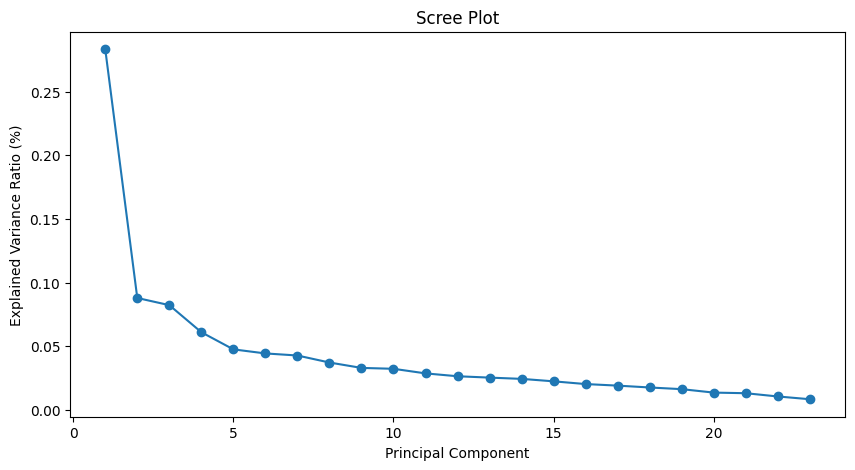

In [196]:
import matplotlib.pyplot as plt
# Scree plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, x.shape[1] + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio (%)')
plt.title('Scree Plot')
plt.show()


##### **Taking first 2 cols for further proceeding**

In [197]:
x_new_pca=pc_data.iloc[:,0:2]
x_new_pca.head()

,0,1
0,3.767415,-0.048718
1,-2.371715,0.225193
2,1.618907,0.132272
3,-2.509832,-1.414707
4,-0.455134,-0.120125


In [198]:
x_new_pca.shape

(2240, 2)

In [199]:
categorical_vars

,Education,Marital_Status
0,2,4
1,2,4
2,2,5
3,2,5
4,4,3
...,...,...
2235,2,3
2236,4,5
2237,2,2
2238,3,5


In [200]:
#concatinating two data frames

import pandas as pd
x_new = pd.concat([x_new_pca, categorical_vars], axis=1, ignore_index=True)
x_new.head()

,0,1,2,3
0,3.767415,-0.048718,2,4
1,-2.371715,0.225193,2,4
2,1.618907,0.132272,2,5
3,-2.509832,-1.414707,2,5
4,-0.455134,-0.120125,4,3


## **Cluster Analysis**
##### **(K-Means cluster)**

In [201]:
x_new.shape

(2240, 4)

In [202]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_new)

  wcss.append(kmeans.inertia_)

In [203]:
kmeans.inertia_

5613.401577792152

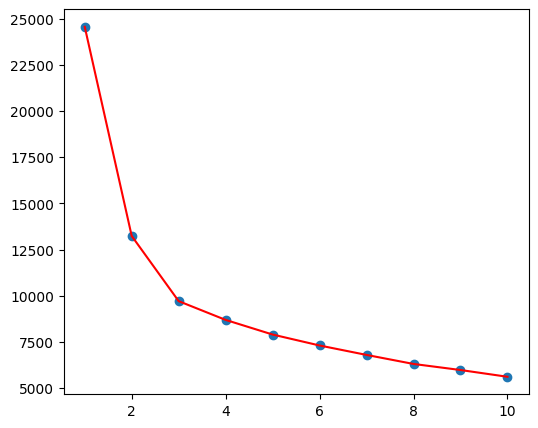

In [204]:
#seeing clusters in Elbow plot
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(range(1,11),wcss)
plt.plot(range(1,11),wcss,color='red')
plt.show()

##### If we observe the above the **Elbow Plot** it seems there is a rapid change in curve from 0-2, but after 3th point it seems less variation. So in my point of view it is good to go with **No of Clusters = 3**

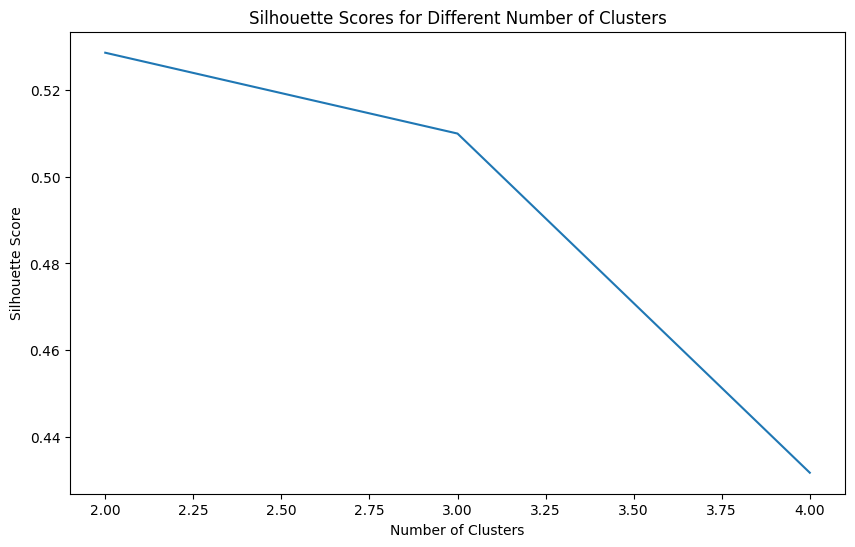

In [205]:
 # using silhouette score

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
silhouette_scores = []

for i in range(2, x_new.shape[1] + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_new_pca)
    silhouette_scores.append(silhouette_score(x_new_pca, kmeans.labels_))

# Plot the silhouette scores for each number of clusters
plt.figure(figsize=(10,6))
plt.plot(range(2, x_new.shape[1] + 1), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.show()


From the above plot , **3 clusters** have high average silhouette score, after that the scores decreases significantly.

**Optimal no. of clusters = 3**

In [206]:
# Taking 3 clusters

from sklearn.cluster import KMeans
clusters=KMeans(n_init=20,n_clusters=3)
Y=clusters.fit_predict(x_new)
Y=pd.DataFrame(Y)
Y.value_counts()

1    1016
2     671
0     553
Name: count, dtype: int64

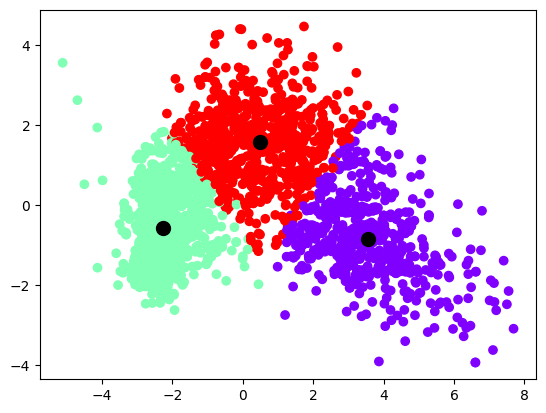

In [207]:
# Scatter plot for 1st two cols
import matplotlib.pyplot as plt
plt.scatter(x_new.iloc[:,0],x_new.iloc[:,1],c=clusters.labels_,cmap="rainbow")
# plotting the centroids
plt.scatter(clusters.cluster_centers_[:,0], clusters.cluster_centers_[:,1], s=100, c='black', label='Centroids')

In [208]:
x_new["Target"]=Y
x_new.head()

,0,1,2,3,Target
0,3.767415,-0.048718,2,4,0
1,-2.371715,0.225193,2,4,1
2,1.618907,0.132272,2,5,2
3,-2.509832,-1.414707,2,5,1
4,-0.455134,-0.120125,4,3,2


In [209]:
y=x_new["Target"]
x=x_new.iloc[:,0:4]
x.head()

,0,1,2,3
0,3.767415,-0.048718,2,4
1,-2.371715,0.225193,2,4
2,1.618907,0.132272,2,5
3,-2.509832,-1.414707,2,5
4,-0.455134,-0.120125,4,3


**Model selection**

In [210]:
#Decision tree classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 1.0
Test accuracy: 0.9732142857142857


In [211]:
#Decision Tree cross validation
import numpy as np
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
from sklearn.model_selection import train_test_split
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train=dt_model.predict(X_train)
    Y_pred_test=dt_model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("cross validation training accuracy score=",np.mean(training_accuracy).round(3))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(3))

cross validation training accuracy score= 1.0
cross validation test accuracy score= 0.975


In [212]:
# Create a DataFrame to store the scores
t1 = pd.DataFrame({
    'Model': ['Decision tree classifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
}, index=[1])

# Print the DataFrame
print(t1.to_string())

                      Model  Training Accuracy  Test Accuracy
1  Decision tree classifier                1.0          0.975


In [213]:
#Random forest classifier

import numpy as np
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30)
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100,max_features=0.7,max_samples=0.6)
RF_clf.fit(X_train, Y_train)
Y_pred_train=RF_clf.predict(X_train)
Y_pred_test=RF_clf.predict(X_test)
from sklearn.metrics import accuracy_score
train_accuracy= accuracy_score(Y_train,Y_pred_train)
test_accuracy = accuracy_score(Y_test,Y_pred_test)
print("training accuracy score=",train_accuracy.round(2))
print("testing accuracy score=",test_accuracy.round(2))

training accuracy score= 1.0
testing accuracy score= 0.99


In [214]:
#Random forest classifier cross validation

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100,max_features=0.7,max_samples=0.6)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RF_clf.fit(X_train,Y_train)
    Y_pred_train=RF_clf.predict(X_train)
    Y_pred_test=RF_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("cross validation training accuracy score=",np.mean(training_accuracy).round(3))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(3))

cross validation training accuracy score= 1.0
cross validation test accuracy score= 0.985


In [215]:
# Create a DataFrame to store the scores
t2 = pd.DataFrame({
    'Model': ['Random forest classifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
}, index=[2])

# Print the DataFrame
print(t2.to_string())

                      Model  Training Accuracy  Test Accuracy
2  Random forest classifier                1.0          0.985


In [216]:
#Bagging classifier

import numpy as np
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(n_estimators=100,max_features=0.7,max_samples=0.6)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    bag_clf.fit(X_train,Y_train)
    Y_pred_train=bag_clf.predict(X_train)
    Y_pred_test=bag_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("cross validation training accuracy score=",np.mean(training_accuracy).round(3))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(3))

cross validation training accuracy score= 1.0
cross validation test accuracy score= 0.959


In [217]:
# Create a DataFrame to store the scores
t3 = pd.DataFrame({
    'Model': ['Bagging classifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
}, index=[3])

# Print the DataFrame
print(t3.to_string())

                Model  Training Accuracy  Test Accuracy
3  Bagging classifier                1.0          0.959


In [218]:
#Adaboost classifier

import numpy as np
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    ada_clf.fit(X_train,Y_train)
    Y_pred_train=ada_clf.predict(X_train)
    Y_pred_test=ada_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))
print("cross validation training accuracy score=",np.mean(training_accuracy).round(3))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(3))

cross validation training accuracy score= 0.78
cross validation test accuracy score= 0.773


In [219]:
# Create a DataFrame to store the scores
t4 = pd.DataFrame({
    'Model': ['AdaBoost classifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
}, index=[4])

# Print the DataFrame
print(t4.to_string())

                 Model  Training Accuracy  Test Accuracy
4  AdaBoost classifier               0.78          0.773


In [220]:
#Gradient boosting classifier

import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100,max_features=0.7)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    gb_clf.fit(X_train,Y_train)
    Y_pred_train=gb_clf.predict(X_train)
    Y_pred_test=gb_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("cross validation training accuracy score=",np.mean(training_accuracy).round(3))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(3))

cross validation training accuracy score= 1.0
cross validation test accuracy score= 0.983


In [221]:
# Create a DataFrame to store the scores
t5 = pd.DataFrame({
    'Model': ['Gradient boosting classifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
}, index=[5])

# Print the DataFrame
print(t5.to_string())

                          Model  Training Accuracy  Test Accuracy
5  Gradient boosting classifier                1.0          0.983


In [222]:
#LGBM classifier

import numpy as np
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(n_estimators=100, max_features=0.7)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lgb_clf.fit(X_train,Y_train)
    Y_pred_train=lgb_clf.predict(X_train)
    Y_pred_test=lgb_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("cross validation training accuracy score=",np.mean(training_accuracy).round(3))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(3))

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 523
[LightGBM] [Info] Number of data points in the train set: 1568, number of used features: 4
[LightGBM] [Info] Start training from score -1.401719
[LightGBM] [Info] Start training from score -0.783876
[LightGBM] [Info] Start training from score -1.213371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [223]:
# Create a DataFrame to store the scores
t6 = pd.DataFrame({
    'Model': ['LGBM classifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
}, index=[6])

# Print the DataFrame
print(t6.to_string())

             Model  Training Accuracy  Test Accuracy
6  LGBM classifier                1.0          0.982


In [224]:
#XGBM classifier

import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xgb_clf = xgb.XGBClassifier(n_estimators=100,colsample_bytree=0.7)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    xgb_clf.fit(X_train,Y_train)
    Y_pred_train=xgb_clf.predict(X_train)
    Y_pred_test=xgb_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))
print("cross validation training accuracy score=",np.mean(training_accuracy).round(3))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(3))

cross validation training accuracy score= 1.0
cross validation test accuracy score= 0.983


In [225]:
# Create a DataFrame to store the scores
t7 = pd.DataFrame({
    'Model': ['XGBM classifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
}, index=[7])

# Print the DataFrame
print(t7.to_string())

             Model  Training Accuracy  Test Accuracy
7  XGBM classifier                1.0          0.983


In [226]:
#Support vector classifier (SVC)

import numpy as np
from sklearn.svm import SVC
svc = SVC(C=1,kernel='rbf')
from sklearn.model_selection import train_test_split
training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.30,random_state=i)
    svc.fit(X_train,Y_train)
    Y_pred_train = svc.predict(X_train)
    Y_pred_test = svc.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation Training score: ", np.mean(training_accuracy).round(3))
print("Cross validation Test score: ", np.mean(test_accuracy).round(3))

Cross validation Training score:  0.993
Cross validation Test score:  0.989


In [227]:
# Create a DataFrame to store the scores
t8 = pd.DataFrame({
    'Model': ['Support vector classifier (SVC)'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
}, index=[8])

# Print the DataFrame
print(t8.to_string())

                             Model  Training Accuracy  Test Accuracy
8  Support vector classifier (SVC)              0.993          0.989


In [228]:
import pandas as pd
Table = pd.concat([t1,t2,t3,t4,t5,t6,t7,t8])
Table


,Model,Training Accuracy,Test Accuracy
1,Decision tree classifier,1.000,0.975
2,Random forest classifier,1.000,0.985
3,Bagging classifier,1.000,0.959
4,AdaBoost classifier,0.780,0.773
5,Gradient boosting classifier,1.000,0.983
6,LGBM classifier,1.000,0.982
7,XGBM classifier,1.000,0.983
8,Support vector classifier (SVC),0.993,0.989



**Random forest classifier** model is selected as it gives better results than other models.

**(Agglomerative clustering)**

In [229]:
import pandas as pd
x_new1 = pd.concat([x_new_pca, categorical_vars], axis=1, ignore_index=True)
x_new1.head()

,0,1,2,3
0,3.767415,-0.048718,2,4
1,-2.371715,0.225193,2,4
2,1.618907,0.132272,2,5
3,-2.509832,-1.414707,2,5
4,-0.455134,-0.120125,4,3


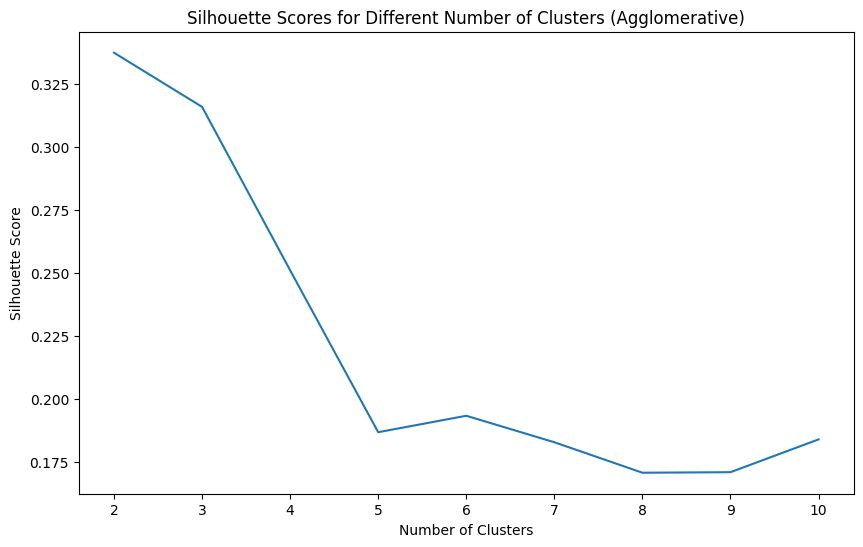

In [230]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Perform agglomerative clustering with different number of clusters
agglom_clusters = []
for i in range(2, 11):
    agglom = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    agglom.fit(x_new1)
    agglom_clusters.append(agglom)

# Calculate silhouette scores for each number of clusters
silhouette_scores = []
for i in range(2, 11):
    silhouette_scores.append(silhouette_score(x_new1, agglom_clusters[i-2].labels_))

# Plot the silhouette scores for each number of clusters
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Number of Clusters (Agglomerative)')
plt.show()


The above plot shows that  **optimal number of clusters is 3** as the silhouette score falls drastically from three clusters.

In [231]:
from sklearn.cluster import AgglomerativeClustering
agglom=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
Y=agglom.fit_predict(x_new1)
Y=pd.DataFrame(Y)
Y.value_counts()

0    1539
1     524
2     177
Name: count, dtype: int64

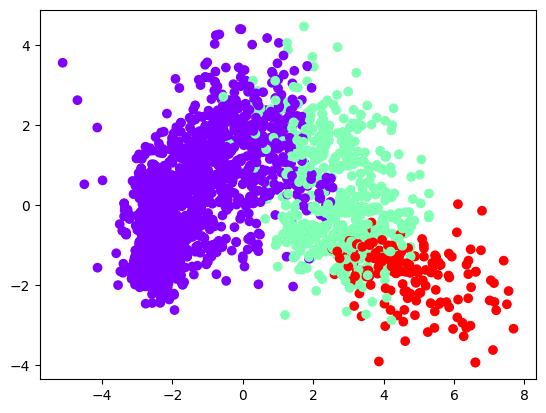

In [232]:
# Scatter plot for 1st two cols
import matplotlib.pyplot as plt
plt.scatter(x_new1.iloc[:,0],x_new1.iloc[:,1],c=agglom.labels_,cmap="rainbow")

In [233]:
x_new1["Target"]=Y
x_new1.head()

,0,1,2,3,Target
0,3.767415,-0.048718,2,4,1
1,-2.371715,0.225193,2,4,0
2,1.618907,0.132272,2,5,0
3,-2.509832,-1.414707,2,5,0
4,-0.455134,-0.120125,4,3,0


In [234]:
y=x_new["Target"]
x=x_new.iloc[:,0:4]
x.head()

,0,1,2,3
0,3.767415,-0.048718,2,4
1,-2.371715,0.225193,2,4
2,1.618907,0.132272,2,5
3,-2.509832,-1.414707,2,5
4,-0.455134,-0.120125,4,3


In [235]:
#Decision tree classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 1.0
Test accuracy: 0.9714285714285714


In [236]:
#Decision Tree cross validation
import numpy as np
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
from sklearn.model_selection import train_test_split
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train=dt_model.predict(X_train)
    Y_pred_test=dt_model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("cross validation training accuracy score=",np.mean(training_accuracy).round(3))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(3))

cross validation training accuracy score= 1.0
cross validation test accuracy score= 0.975


In [237]:
# Create a DataFrame to store the scores
ta1 = pd.DataFrame({
    'Model': ['Decision tree classifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
}, index=[1])

# Print the DataFrame
print(ta1.to_string())

                      Model  Training Accuracy  Test Accuracy
1  Decision tree classifier                1.0          0.975


In [238]:
#Random forest classifier

import numpy as np
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30)
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100,max_features=0.7,max_samples=0.6)
RF_clf.fit(X_train, Y_train)
Y_pred_train=RF_clf.predict(X_train)
Y_pred_test=RF_clf.predict(X_test)
from sklearn.metrics import accuracy_score
train_accuracy= accuracy_score(Y_train,Y_pred_train)
test_accuracy = accuracy_score(Y_test,Y_pred_test)
print("training accuracy score=",train_accuracy.round(2))
print("testing accuracy score=",test_accuracy.round(2))

training accuracy score= 1.0
testing accuracy score= 0.99


In [239]:
#Random forest classifier cross validation

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100,max_features=0.7,max_samples=0.6)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RF_clf.fit(X_train,Y_train)
    Y_pred_train=RF_clf.predict(X_train)
    Y_pred_test=RF_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("cross validation training accuracy score=",np.mean(training_accuracy).round(3))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(3))

cross validation training accuracy score= 1.0
cross validation test accuracy score= 0.985


In [240]:
# Create a DataFrame to store the scores
ta2 = pd.DataFrame({
    'Model': ['Random forest classifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
}, index=[2])

# Print the DataFrame
print(ta2.to_string())

                      Model  Training Accuracy  Test Accuracy
2  Random forest classifier                1.0          0.985


In [241]:
#Bagging classifier

import numpy as np
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(n_estimators=100,max_features=0.7,max_samples=0.6)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    bag_clf.fit(X_train,Y_train)
    Y_pred_train=bag_clf.predict(X_train)
    Y_pred_test=bag_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("cross validation training accuracy score=",np.mean(training_accuracy).round(3))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(3))

cross validation training accuracy score= 1.0
cross validation test accuracy score= 0.961


In [242]:
# Create a DataFrame to store the scores
ta3 = pd.DataFrame({
    'Model': ['Bagging classifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
}, index=[3])

# Print the DataFrame
print(ta3.to_string())

                Model  Training Accuracy  Test Accuracy
3  Bagging classifier                1.0          0.961


In [243]:
#Adaboost classifier

import numpy as np
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    ada_clf.fit(X_train,Y_train)
    Y_pred_train=ada_clf.predict(X_train)
    Y_pred_test=ada_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))
print("cross validation training accuracy score=",np.mean(training_accuracy).round(3))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(3))

cross validation training accuracy score= 0.78
cross validation test accuracy score= 0.773


In [244]:
# Create a DataFrame to store the scores
ta4 = pd.DataFrame({
    'Model': ['AdaBoost classifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
}, index=[4])

# Print the DataFrame
print(ta4.to_string())

                 Model  Training Accuracy  Test Accuracy
4  AdaBoost classifier               0.78          0.773


In [245]:
#Gradient boosting classifier

import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100,max_features=0.7)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    gb_clf.fit(X_train,Y_train)
    Y_pred_train=gb_clf.predict(X_train)
    Y_pred_test=gb_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("cross validation training accuracy score=",np.mean(training_accuracy).round(3))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(3))

cross validation training accuracy score= 1.0
cross validation test accuracy score= 0.983


In [246]:
# Create a DataFrame to store the scores
ta5 = pd.DataFrame({
    'Model': ['Gradient boosting classifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
}, index=[5])

# Print the DataFrame
print(ta5.to_string())

                          Model  Training Accuracy  Test Accuracy
5  Gradient boosting classifier                1.0          0.983


In [247]:
#LGBM classifier

import numpy as np
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(n_estimators=100, max_features=0.7)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lgb_clf.fit(X_train,Y_train)
    Y_pred_train=lgb_clf.predict(X_train)
    Y_pred_test=lgb_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("cross validation training accuracy score=",np.mean(training_accuracy).round(3))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(3))

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 523
[LightGBM] [Info] Number of data points in the train set: 1568, number of used features: 4
[LightGBM] [Info] Start training from score -1.401719
[LightGBM] [Info] Start training from score -0.783876
[LightGBM] [Info] Start training from score -1.213371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [248]:
# Create a DataFrame to store the scores
ta6 = pd.DataFrame({
    'Model': ['LGBM classifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
}, index=[6])

# Print the DataFrame
print(ta6.to_string())

             Model  Training Accuracy  Test Accuracy
6  LGBM classifier                1.0          0.982


In [249]:
#XGBM classifier

import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xgb_clf = xgb.XGBClassifier(n_estimators=100,colsample_bytree=0.7)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    xgb_clf.fit(X_train,Y_train)
    Y_pred_train=xgb_clf.predict(X_train)
    Y_pred_test=xgb_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))
print("cross validation training accuracy score=",np.mean(training_accuracy).round(3))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(3))

cross validation training accuracy score= 1.0
cross validation test accuracy score= 0.983


In [250]:
# Create a DataFrame to store the scores
ta7 = pd.DataFrame({
    'Model': ['XGBM classifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
}, index=[7])

# Print the DataFrame
print(ta7.to_string())

             Model  Training Accuracy  Test Accuracy
7  XGBM classifier                1.0          0.983


In [251]:
#Support vector classifier (SVC)

import numpy as np
from sklearn.svm import SVC
svc = SVC(C=1,kernel='rbf')
from sklearn.model_selection import train_test_split
training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.30,random_state=i)
    svc.fit(X_train,Y_train)
    Y_pred_train = svc.predict(X_train)
    Y_pred_test = svc.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation Training score: ", np.mean(training_accuracy).round(3))
print("Cross validation Test score: ", np.mean(test_accuracy).round(3))

Cross validation Training score:  0.993
Cross validation Test score:  0.989


In [252]:
# Create a DataFrame to store the scores
ta8 = pd.DataFrame({
    'Model': ['Support vector classifier (SVC)'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
}, index=[8])

# Print the DataFrame
print(t8.to_string())

                             Model  Training Accuracy  Test Accuracy
8  Support vector classifier (SVC)              0.993          0.989


In [253]:
import pandas as pd
Table1 = pd.concat([ta1,ta2,ta3,ta4,ta5,ta6,ta7,ta8])
Table1

,Model,Training Accuracy,Test Accuracy
1,Decision tree classifier,1.000,0.975
2,Random forest classifier,1.000,0.985
3,Bagging classifier,1.000,0.961
4,AdaBoost classifier,0.780,0.773
5,Gradient boosting classifier,1.000,0.983
6,LGBM classifier,1.000,0.982
7,XGBM classifier,1.000,0.983
8,Support vector classifier (SVC),0.993,0.989


In [254]:
Table

,Model,Training Accuracy,Test Accuracy
1,Decision tree classifier,1.000,0.975
2,Random forest classifier,1.000,0.985
3,Bagging classifier,1.000,0.959
4,AdaBoost classifier,0.780,0.773
5,Gradient boosting classifier,1.000,0.983
6,LGBM classifier,1.000,0.982
7,XGBM classifier,1.000,0.983
8,Support vector classifier (SVC),0.993,0.989




**Random forest classifier** model is selected as it shows better results than other models.
